In [60]:
import numpy as np
import pandas as pd
import math
from tabulate import tabulate


In [61]:
#Converting the given json file into a pandas dataframe
df=pd.read_json('loan_data.json')
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [62]:
#Checking for Null Values
df.isnull().sum()

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

# 1.Percentage of Total applicants for each unique value of dependents

In [63]:
#Chceking for all the unique values in the Dependents column 
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

This says that, there are 4 categories of applicants when divided based on the dependents they have. They are, applicants with 0 dependents, 1 dependent, 2 dependents, 3+ dependents.

In [64]:
#Total number of values in each column
df.count()

Application_ID        511
Gender                511
Married               511
Dependents            511
Education             511
Self_Employed         511
Credit_History        511
Property_Area         511
Income                511
Application_Status    511
dtype: int64

Since there are no NULL values and the Count of values of the 'Application_ID' column is 511, it can be concluded that the Total number of Applicants are 511

In [65]:
#Calculating the Percentage of Total applicants for each unique value of dependents
z=(df['Dependents'].value_counts()/df['Application_ID'].count()*100)
z

0     57.534247
2     17.221135
1     16.634051
3+     8.610568
Name: Dependents, dtype: float64

In [66]:
#Creating an array of the percentages calculated above and rounding off the percentages upto 3 decimals
y=np.array(np.round_(z, decimals = 3))
y

array([57.534, 17.221, 16.634,  8.611])

Here, I'm making a dataframe of Unique values Dependents, Number of applicants for each unique value of dependent and the percentage of total applicants.

In [67]:
print('Percentage of Total applicants for each unique value of dependents')
a=df[['Application_ID','Dependents']].groupby('Dependents').count()
x=pd.DataFrame(a)
x.columns = ['Number of Applicants']
x['Percentage of applicants']=y
x['Percentage of applicants']=x['Percentage of applicants'].astype(str) + '%'
print(tabulate(x, headers = 'keys', tablefmt = 'psql'))

Percentage of Total applicants for each unique value of dependents
+--------------+------------------------+----------------------------+
| Dependents   |   Number of Applicants | Percentage of applicants   |
|--------------+------------------------+----------------------------|
| 0            |                    294 | 57.534%                    |
| 1            |                     85 | 17.221%                    |
| 2            |                     88 | 16.634%                    |
| 3+           |                     44 | 8.611%                     |
+--------------+------------------------+----------------------------+


# 2.Percentage of Applications approved for self employed applicants

In [68]:
#Calculating Number of approved applications for Self employed Applicants
num=len(df[(df['Application_Status']=='Y') & (df['Self_Employed']=='Yes')])
num

46

In [69]:
#Calculating Number of rejected applications for Self employed Applicants
rem=len(df[(df['Application_Status']=='N') & (df['Self_Employed']=='Yes')])
rem

24

In [70]:
#Calculating Percentage of Applications approved for self employed applicants and rounding it off 
percent=(num/(num+rem))*100
print("The Percentage of Applications approved for self employed applicants is",round(percent,3),"%")

The Percentage of Applications approved for self employed applicants is 65.714 %


# 3.Percentage of Rejections for Married Male applicants

In [71]:
#Calculates Married Male Applicants
mm=len(df[(df['Gender']=='Male') & (df['Married']=='Yes')])
mm

306

In [72]:
#Calculates the number of Married Male Applicants whose applications got rejected
mmn=len(df[(df['Gender']=='Male') & (df['Married']=='Yes') & (df['Application_Status']=='N')])
mmn

87

In [73]:
#Calculates Percentage of rejections for Married Male Applicants and rounding it off 
print("The Percentage of rejections for Married Male applicants is",round(mmn/mm,3),"%")

The Percentage of rejections for Married Male applicants is 0.284 %


# 4. Property Area that has Maximum approval ratio

In [74]:
#Checking for all Unique values of Property_Area column
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

So in total there are 3 types of Property Areas, only, from where the applicants come.

In [75]:
#Counting Number of applicants from each property group
countU=df['Property_Area'].value_counts()['Urban'] #Calculates Number of applicants from Urban area
print("Number of applicants from Urban area:",countU)
countR=df['Property_Area'].value_counts()['Rural'] #Calculates Number of applicants from Rural area
print("Number of applicants from Rural area:",countR)
countS=df['Property_Area'].value_counts()['Semiurban'] #Calculates Number of applicants from Semi-Urban area
print("Number of applicants from Semi-Urban area",countS)

Number of applicants from Urban area: 165
Number of applicants from Rural area: 149
Number of applicants from Semi-Urban area 197


In [76]:
#Counting number of approved applications for each property area 
countUY=len(df[(df['Property_Area']=='Urban') & (df['Application_Status']=='Y')])#Calculates Number of Applications approved for applicants from Urban area
print("Number of Applications approved for applicants from Urban area:",countUY)
countRY=len(df[(df['Property_Area']=='Rural') & (df['Application_Status']=='Y')])#Calculates Number of Applications approved for applicants from Rural area
print("Number of Applications approved for applicants from Rural area:",countRY)
countSY=len(df[(df['Property_Area']=='Semiurban') & (df['Application_Status']=='Y')])#Calculates Number of Applications approved for applicants from Semi-Urban area
print("Number of Applications approved for applicants from Semi-Urban area:",countSY)

Number of Applications approved for applicants from Urban area: 104
Number of Applications approved for applicants from Rural area: 90
Number of Applications approved for applicants from Semi-Urban area: 153


In [77]:
#Calculating Approval Ratio for each Property Area
u=countUY/countU
r=countRY/countR
s=countSY/countS
print(u,r,s)

0.6303030303030303 0.6040268456375839 0.7766497461928934


In [78]:
#Printing the name of Property Area which has Maximum approval ratio
Area={'Urban':u,'Rural':r,'Semi-urban':s}
A_max = max(Area, key=Area.get)
print("The Property area that has Maximum Approval Ratio:",A_max)

The Property area that has Maximum Approval Ratio: Semi-urban


# 5. Average number of dependents per income group

In [79]:
#Checking for all Unique values of Income column
df['Income'].unique()

array(['medium', 'low', 'high'], dtype=object)

So in total there are 3 Income groups of the applicants.

In [80]:
#Grouping dependents based on Income and calculating the number of Applicants
df.groupby(['Income','Dependents'])['Application_ID'].count()

Income  Dependents
high    0              21
        1              13
        2               6
        3+              5
low     0             173
        1              42
        2              41
        3+             17
medium  0             100
        1              30
        2              41
        3+             22
Name: Application_ID, dtype: int64

We can see that the Dependents column has the values, 0,1,2,3+. There is no clarity over the exact number of Dependents the applicant has, wherever '3+' is mentioned. So for calculation purposes, I'm assuming '3+' dependents to be '3' and calculating the average number of dependents. The real average values per income group would slightly differ(would be slightly higher than the ones I calculated below).

In [81]:
d0h=len(df[(df['Income']=='high') & (df['Dependents']=='0')])#Calculates Number of Applicants in High income group with no dependents

d1h=len(df[(df['Income']=='high') & (df['Dependents']=='1')])#Calculates Number of Applicants in High income group with 1 dependent

d2h=len(df[(df['Income']=='high') & (df['Dependents']=='2')])#Calculates Number of Applicants in High income group with 2 dependents

d3h=len(df[(df['Income']=='high') & (df['Dependents']=='3+')])#Calculates Number of Applicants in High income group with 3+ dependents

dh=((0*d0h)+(1*d1h)+(2*d2h)+(3*d3h))/(d0h+d1h+d2h+d3h)#Calculates Average number of dependents for High Income group

print("Average number of Dependents for High Income group:",round(dh,3))

Average number of Dependents for High Income group: 0.889


In [82]:
d0m=len(df[(df['Income']=='medium') & (df['Dependents']=='0')])#Calculates Number of Applicants in Medium income group with no dependents

d1m=len(df[(df['Income']=='medium') & (df['Dependents']=='1')])#Calculates Number of Applicants in Medium income group with 1 dependent


d2m=len(df[(df['Income']=='medium') & (df['Dependents']=='2')])#Calculates Number of Applicants in Medium income group with 2 dependents

d3m=len(df[(df['Income']=='medium') & (df['Dependents']=='3+')])#Calculates Number of Applicants in Medium income group with 3+ dependents


dm=((0*d0m)+(1*d1m)+(2*d2m)+(3*d3m))/(d0m+d1m+d2m+d3m)#Calculates Average number of dependents for Medium Income group

print("Average number of Dependents for Medium Income group:",round(dm,3))

Average number of Dependents for Medium Income group: 0.922


In [83]:
d0l=len(df[(df['Income']=='low') & (df['Dependents']=='0')])#Calculates Number of Applicants in low income group with no dependents

d1l=len(df[(df['Income']=='low') & (df['Dependents']=='1')])#Calculates Number of Applicants in low income group with 1 dependent

d2l=len(df[(df['Income']=='low') & (df['Dependents']=='2')])#Calculates Number of Applicants in low income group with 2 dependents

d3l=len(df[(df['Income']=='low') & (df['Dependents']=='3+')])#Calculates Number of Applicants in low income group with 3+ dependents



dl=((0*d0l)+(1*d1l)+(2*d2l)+(3*d3l))/(d0l+d1l+d2l+d3l)#Calculates Average number of dependents for low Income group


print("Average number of Dependents for low Income group:",round(dl,3))

Average number of Dependents for low Income group: 0.641


# 6.Approval Ratios based on Property Area and Marital Status

In [25]:
#Counting Urban married Applicants
UM=len(df[(df['Property_Area']=='Urban') & (df['Married']=='Yes')])
print(UM)
#Counting Urban Unmarried Applicants
UUM=len(df[(df['Property_Area']=='Urban') & (df['Married']=='No')])
print(UUM)

109
56


In [26]:
#Counting Semi-Urban married Applicants
SM=len(df[(df['Property_Area']=='Semiurban') & (df['Married']=='Yes')])
print(SM)
#Counting Semi-Urban Unmarried Applicants
SUM=len(df[(df['Property_Area']=='Semiurban') & (df['Married']=='No')])
print(SUM)

129
68


In [27]:
#Counting Rural married Applicants
RM=len(df[(df['Property_Area']=='Rural') & (df['Married']=='Yes')])
print(RM)
#Counting Rural Unmarried Applicants
RUM=len(df[(df['Property_Area']=='Rural') & (df['Married']=='No')])
print(RUM)

93
56


In [28]:
#Counting approved applicantions of Urban married Applicants
UMY=len(df[(df['Property_Area']=='Urban') & (df['Married']=='Yes') & (df['Application_Status']=='Y')])
print(UMY)
#Counting approved applicantions of Urban unmarried Applicants
UUMN=len(df[(df['Property_Area']=='Urban') & (df['Married']=='No')& (df['Application_Status']=='Y')])
print(UUMN)

74
30


In [29]:
#Counting approved applicantions of semi-Urban married Applicants
SMY=len(df[(df['Property_Area']=='Semiurban') & (df['Married']=='Yes') & (df['Application_Status']=='Y')])
print(SMY)
#Counting approved applicantions of semi-Urban unmarried Applicants
SUMN=len(df[(df['Property_Area']=='Semiurban') & (df['Married']=='No')& (df['Application_Status']=='Y')])
print(SUMN)

106
47


In [30]:
#Counting approved applicantions of rural married Applicants
RMY=len(df[(df['Property_Area']=='Rural') & (df['Married']=='Yes') & (df['Application_Status']=='Y')])
print(RMY)
#Counting approved applicantions of rural unmarried Applicants
RUMN=len(df[(df['Property_Area']=='Rural') & (df['Married']=='No')& (df['Application_Status']=='Y')])
print(RUMN)

56
34


In [31]:
#Calculating approval ratio of Urban Married Applicants
ua=round(UMY/UM,3)
#Calculating approval ratio of Rural Married Applicants
ra=round(RMY/RM,3)
#Calculating approval ratio of Semi-Urban Married Applicants
sa=round(SMY/SM,3)

#Calculating approval ratio of Urban unmarried Applicants
un=round(UUMN/UM,3)
#Calculating approval ratio of Rural unmarried Applicants
rn=round(RUMN/RM,3)
#Calculating approval ratio of sem-Urban unmarried Applicants
sn=round(SUMN/SM,3)


print(ua,sa,ra)
print(un,sn,rn)

0.679 0.822 0.602
0.275 0.364 0.366


In [33]:
#Creating a dictionary of the required results
results = {
...     'Property_Area': ['Urban', 'Urban','Semiurban','Semiurban', 'Rural','Rural'],
...     'Martial_Status': ['Married', 'Unmarried','Married', 'Unmarried','Married', 'Unmarried'],
...     '# of Applicants': [UM, UUM, SM, SUM, RM, RUM],
...     'Approval Ratio': [ua,un,sa,sn,ra,rn]}

In [34]:
R = pd.DataFrame(data=results)
print(tabulate(R, headers = 'keys', tablefmt = 'psql'))#printing the dataframe in tabular form

+----+-----------------+------------------+-------------------+------------------+
|    | Property_Area   | Martial_Status   |   # of Applicants |   Approval Ratio |
|----+-----------------+------------------+-------------------+------------------|
|  0 | Urban           | Married          |               109 |            0.679 |
|  1 | Urban           | Unmarried        |                56 |            0.275 |
|  2 | Semiurban       | Married          |               129 |            0.822 |
|  3 | Semiurban       | Unmarried        |                68 |            0.364 |
|  4 | Rural           | Married          |                93 |            0.602 |
|  5 | Rural           | Unmarried        |                56 |            0.366 |
+----+-----------------+------------------+-------------------+------------------+


# 7. Predictive Model for Loan Application approval

From the data, we can see that the Application_Status (which is to be predicted) is of two forms: Y or No (alias Yes or No). Clearly, this is a classification problem. Many a times, we don't know which Model would give the best accuracy. Ideally,we can train some models and check which model performs better on a certain problem.While we can use either Linear or Non-Linear Classification algorithms  for this problem, I'm going to use Logistic Regression and Random Forest Classifier to see which Model would give better results. I can still experiment with SVC,Decision tree etc, but for simplicity, I'm going to check only for these 2 models.

In [84]:
#import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [86]:
df=df.drop(columns=['Application_ID'])

So except Credit_History all of them are categorical variables. We can avoid Application_ID.

In [87]:
#Dividing the columns into Categorical and Numerical for the sake of Visualization
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Income','Application_Status']
print(categorical_columns)
numerical_columns = ['Credit_History']
print(numerical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Income', 'Application_Status']
['Credit_History']


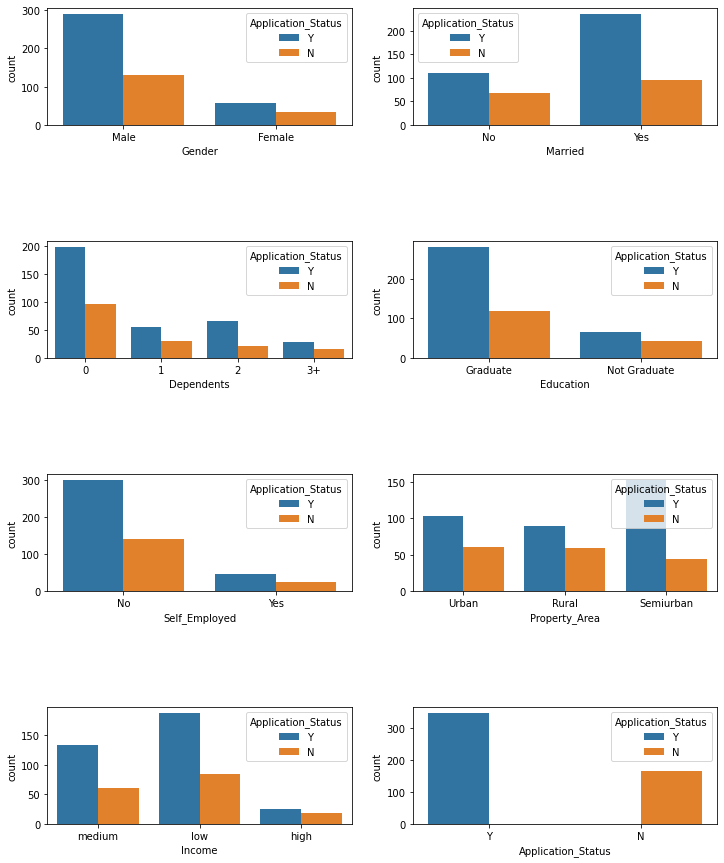

In [88]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Application_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Here, we can see that:
1.The Number of Applications approved is highest for those who do not have any dependent.
2.The Number of Applications approved is highest for those who are graduates
3.The Number of Applications approved is highest for those who are not self-employed
4.The Number of Applications approved is highest for those who belong the Semi-Urban area
5.The Number of Applications approved is highest for Low Income Applicants

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

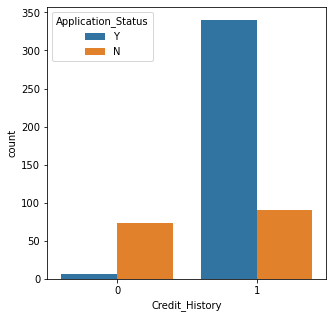

In [89]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot('Credit_History',data=df,hue='Application_Status')

Those who have a Credit History of 1, have a higher chance of getting the Loan Approved

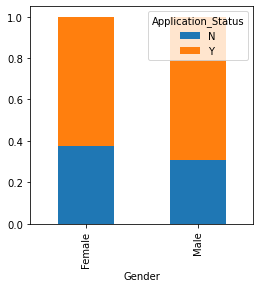

In [90]:
Gender=pd.crosstab(df['Gender'],df['Application_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

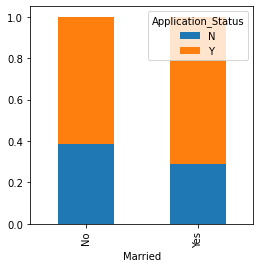

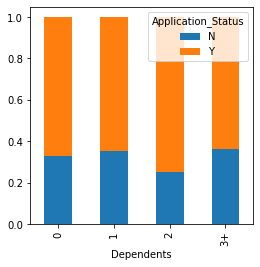

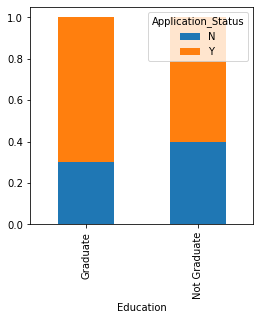

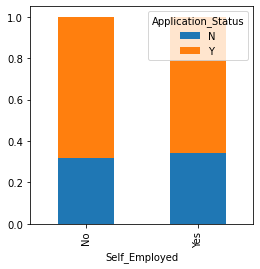

In [91]:
Married=pd.crosstab(df['Married'],df['Application_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Application_Status'])
Education=pd.crosstab(df['Education'],df['Application_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Application_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

The proportion of married applicants is higher for approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Application_Status.

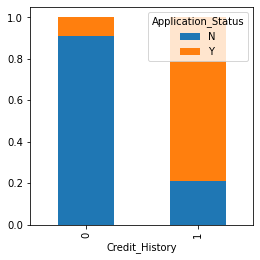

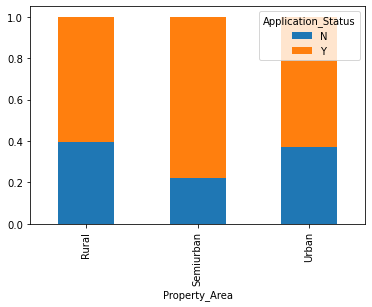

In [92]:
Credit_History=pd.crosstab(df['Credit_History'],df['Application_Status'])
Property_Area=pd.crosstab(df['Property_Area'],df['Application_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

People with a credit history as 1 are more likely to get their loans approved.
The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

In [93]:
from sklearn import preprocessing
    
# label_encoder object knows to understand word labels
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

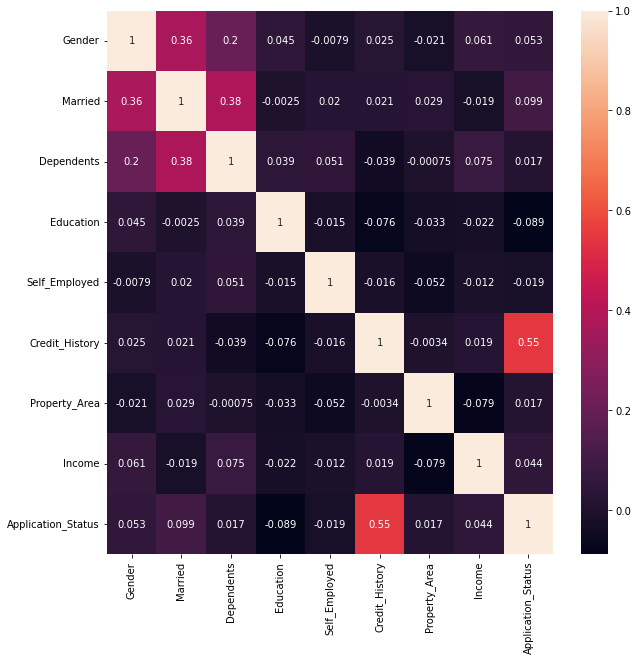

In [94]:
plt.figure(figsize = (10,10))
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

Here we can see that, there is a high correlation between credit history and Application status. So itseems like an applicant's credit history plays an important role in their Loan Approval. Next priority while approving loan is probably given to Marital Status, as the correlation between Application status and Marital Status is the Second highest. The correlation between Income and Application Status is the third highest, so the next priority while approving loan is probably given to the Income status of the Applicant.

In [95]:
X = df.drop(['Application_Status'],axis=1)
Y = df['Application_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((357, 8), (154, 8), (357,), (154,))

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
  
from sklearn import metrics
  

rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)

lc = LogisticRegression()
  
# making predictions on the training set
for clf in (rfc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 87.39495798319328
Accuracy score of  LogisticRegression = 80.95238095238095


In [97]:
for clf in (rfc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 74.02597402597402
Accuracy score of  LogisticRegression = 80.51948051948052


Accuracy on Logistic Regression is higher than that of Random Classifier on the Test data. So I applied a gridsearch on Logistic regression in an attempt to improve the accuracy on the test data

In [124]:
from sklearn.model_selection import GridSearchCV
Lparam_grid={
            'C':[0.001,0.009,0.01,0.09,1,5,10,25],
            'penalty':['l1','l2'],
            'max_iter':list(range(1, 20, 2)),
            'solver':['lbfgs','liblinear','sag']
            }
Lsearch=GridSearchCV(LogisticRegression(),Lparam_grid,refit=True,verbose=3,cv=10)
Lsearch.fit(X_train,Y_train)
Lsearch.best_params_

print('Accuracy: %f' % Lsearch.best_score_)
print("Config: %s" % Lsearch.best_params_)


Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[CV 1/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.001, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.001, m

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 5/10] END C=0.001, max_iter=1, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=1, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=1, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=1, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=1, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=1, penalty=l2, solver=liblinear;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.001, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=1, penalty=l2, solver

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 5/10] END C=0.001, max_iter=3, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=3, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=3, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=3, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=3, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=3, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.001, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=3, penalty=l2, solver

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=0.001, max_iter=7, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=7, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=7, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=7, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=7, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=7, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=7, penalty=l1, solver=liblinear;, score=0.286 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=0.001, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=0.001, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=0.001, max_iter=7, penalty=l1, solver

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=0.001, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=7, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=7, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=7, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.001, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.001, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.001, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 10/10] END C=0.001, max_iter=9, penalty=l1, solver=liblinear;, score=0.286 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=0.001, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] E

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 3/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=11, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=11, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.001, max_iter=11, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=11, penalty=l2, sol

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 2/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=13, penalty=l1, solver=liblinear;, score=0.286 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=0.001, max_

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 4/10] END C=0.001, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=15, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=15, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=15, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=15, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.001, max_iter=15, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=15, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=15, penalty=l2,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 9/10] END C=0.001, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.001, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 2/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=17, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 9/10] END C=0.001, max_iter

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 5/10] END C=0.001, max_iter=19, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=19, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=19, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=19, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=19, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=19, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.001, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=19, penalty

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=0.009, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=1, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=1, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=1, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.009, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.009, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.009, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.009, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 5/10] END C=0.009, max_iter=3, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=3, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=3, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=3, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=3, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=3, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.009, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.009, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.009, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.009, max_iter=3, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=3, penalty=l2, solver

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

[CV 1/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 2/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 3/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 4/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=5, penalty=l1, solver=liblinear;, score=0.286 total time=   0.0s
[CV 1/10] END C=0.009, max_it

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 1/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=7, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.009, max_iter=7, penalty=l2, solver=liblinear;, sco

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=0.009, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=7, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=7, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=7, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=7, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.009, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.009, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.009, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.009, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_l

[CV 8/10] END C=0.009, max_iter=9, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=9, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=9, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.009, max_iter=9, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.009, max_iter=9, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.009, max_iter=9, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.009, max_iter=9, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=9, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=9, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=9, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=9, penalt

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 2/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=11, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.009, max_iter=11, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.009, max_iter=11, penalty=l2, solver=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 7/10] END C=0.009, max_iter=11, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=11, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.009, max_iter=11, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.009, max_iter=11, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.009, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.009, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.009, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.009, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.009, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.009, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.009, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 8/10] END C=0.009, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=0.009, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=0.009, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=15, penalty=l2, solver=lbfgs;, score=0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 9/10] END C=0.009, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.009, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 2/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 3/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 4/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 5/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 6/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 7/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 8/10] END C=0.009, max_iter=17, penalty=l1, solver=liblinear;, score=0.314 total time=   0.0s
[CV 9/10] END C=0.009, max_iter

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 5/10] END C=0.01, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=1, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=1, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=1, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.01, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.01, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.01, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.01, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.01, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10]

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 8/10] END C=0.01, max_iter=3, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=3, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=3, penalty=l2, solver=liblinear;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=3, penalty=l2, solver=sag;, score=0.686 total time

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 2/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=5, penalty=l2, solver=liblinear;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.01, max_iter=5, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.01, max_iter=5, penalty=l2,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 3/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=7, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.01, max_iter=7, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.01, max_iter=7, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.01, max_iter=7, penalty=l2, solver=liblinear;, score=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=0.01, max_iter=9, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.01, max_iter=9, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=9, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=9, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=9, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=9, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=9, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.01, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.01, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.01, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.01, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 4/10] END C=0.01, max_iter=13, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.01, max_iter=13, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=13, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=13, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=13, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=13, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=13, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.01, max_iter=13, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/10] END C=0.01, max_iter=13, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.01, max_iter=13, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.01, max_iter=13, penalty=l2, solver=lib

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 2/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 4/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 5/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=13, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 1/10] END C=0.01, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.01, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.01, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.01, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 2/10] END C=0.01, max_iter=17, penalty=l1, solver=liblinear;, score=0.306 total

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 3/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.667 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.743 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=1, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=1, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=1, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=1, penalty=l2, solve

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-pack

[CV 2/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=0.09, max_iter=3, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=0.09, max_iter=3, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=3, penalty=l2, solver=lbfgs;, score=0.722 total time=   0.0s
[CV 3/10] END C=0.09, m

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 7/10] END C=0.09, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.09, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.09, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.09, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.09, max_iter=5, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=5, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=5, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=5, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=5, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=5, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=5, penalty=l1, solver=liblinear;

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:8

[CV 4/10] END C=0.09, max_iter=5, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=5, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=5, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=5, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=5, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=5, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=5, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=5, penalty=l2, solver=sag;

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 10/10] END C=0.09, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=7, penalty=l2, solver=lbfgs;, score=0.771 total tim

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 8/10] END C=0.09, max_iter=7, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=7, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=7, penalty=l2, solver=sag;, score=0.771 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.09, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10]

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 9/10] END C=0.09, max_iter=9, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=9, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=9, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=9, penalty=l2, s

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=0.09, max_iter=11, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=11, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=11, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=11, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=11, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=11, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=11, penalty=l2, solver=sag;, score=0.771 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.09, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.09, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.09, max_iter=13, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt


[CV 6/10] END C=0.09, max_iter=13, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=13, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=13, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=13, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=13, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=13, penalty=l2, s

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht


[CV 7/10] END C=0.09, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.09, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.09, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.09, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.09, max_iter=15, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=15, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=15, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=15, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=15, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=15, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=15, penalty=l1, solve

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 10/10] END C=0.09, max_iter=15, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=15, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=1

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 10/10] END C=0.09, max_iter=17, penalty=l2, solver=sag;, score=0.771 total time=   0.0s
[CV 1/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.09, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/sit

[CV 5/10] END C=0.09, max_iter=19, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=0.09, max_iter=19, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=0.09, max_iter=19, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=0.09, max_iter=19, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 9/10] END C=0.09, max_iter=19, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=0.09, max_iter=19, penalty=l2, solver=sag;, score=0.771 total time=   0.0s
[CV 1/10] END C=1, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=1, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=1, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=1, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=1, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=1,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 6/10] END C=1, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=1, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=1, max_iter=1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=1, max_iter=1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=1, max_iter=1, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=1, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/10] END C=1, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-pack

[CV 1/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=3, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=3, penalty=l1, solver=sag;, score=nan tot

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 7/10] END C=1, max_iter=3, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=3, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=3, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=3, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=3, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 2/10] END C=1, max_iter=3, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=3, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=3, penalty=l2, solver=sag;, score=0.833 total time=   0.0s
[CV 5/10] END C=1, max_iter=3, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=3, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 7/10] END C=1, max_iter=3, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=1,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV 1/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=5, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=5, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 8/10] END C=1, max_iter=5, penalty=l2, solver=sag;, score=0.714 total time=   0.0s
[CV 9/10] END C=1, max_iter=5, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=5, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=1, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=1, max_iter=7, penalty=l1,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 7/10] END C=1, max_iter=7, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=7, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=7, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=7, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=7, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=7, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=7, penalty=l2, solver=liblinear;, score=0.861 total time=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 4/10] END C=1, max_iter=9, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=9, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=9, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=9, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=9, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=9, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=9, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=1, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=1, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=1, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 1/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=9, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=1, max_iter=11, penalty=l

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 3/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=11, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=11, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 8/10] END C=1, max_iter=13, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=13, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=13, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=13, penalty=l2, solver=liblinear;, score=0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 8/10] END C=1, max_iter=15, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=15, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=15, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=15, penalty=l2, solver=liblinear;, score=0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 1/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=17, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=17, penalty=l1, solver=sag;, sc

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or

[CV 9/10] END C=1, max_iter=17, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=17, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, scor

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 1/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=19, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=19, penalty=l1, solver=sag;, sc

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 7/10] END C=1, max_iter=19, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=1, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=1, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=1, max_iter=19, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=1, max_iter=19, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=1, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=1, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=1, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=1, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=1, max_iter=19, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=1, max_iter=19, penalty=l2, solver=liblinear;, score=0.861 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 10/10] END C=1, max_iter=19, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=5, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=5, max_iter=1, penalty=l

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 9/10] END C=5, max_iter=1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=5, max_iter=1, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=1, penalty=l2, solver=liblinear;, score=0.829 tot

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 5/10] END C=5, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=5, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=5, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=5, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=5, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=5, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=5, max_iter=3, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] EN

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 2/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=3, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=3, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 2/10] END C=5, max_iter=3, penalty=l2, solver=sag;, score=0.806 total t

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 1/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=5, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=5, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s


[CV 5/10] END C=5, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=5, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=5, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=5, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=5, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=5, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=5, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=5, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=5, max_iter=7, penalty=l1

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:8

[CV 6/10] END C=5, max_iter=7, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=7, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=7, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=7, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=7, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=7, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=7, penalty=l2, solver=liblinear;, score=0.778 total time=   0

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-pack

[CV 6/10] END C=5, max_iter=9, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=9, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=9, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=9, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=9, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=5, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=5, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=5, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=5, max_i

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 2/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=9, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=11, penalty=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht


[CV 10/10] END C=5, max_iter=11, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=11, penalty=l2, solver=liblinear;

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 9/10] END C=5, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=5, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=13, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3


[CV 3/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=13, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=5, max_iter=15

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=5, max_iter=15, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=15, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=15, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=15, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=15, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=15, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=15, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time= 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/p


[CV 8/10] END C=5, max_iter=15, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=15, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=15, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=5, max_iter=17, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=5, max_iter=17

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 2/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=17, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=17, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3


[CV 3/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=17, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=5, max_iter=19

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 1/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=5, max_iter=19, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=5, max_iter=19, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 1/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 2/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 3/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 4/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=10, max_iter=1, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=10, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=10, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=10, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=10, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=10, max_iter=3, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=3, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/1

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 6/10] END C=10, max_iter=3, penalty=l2, solver=lbfgs;, score=0.722 total time=   0.1s
[CV 7/10] END C=10, max_iter=3, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.1s
[CV 8/10] END C=10, max_iter=3, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=3, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 10/10] END C=10, max_iter=3, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s


/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 2/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=3, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=3, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 2/10] END C=10, max_iter=3, penalty=l2, solver=sag;, score=0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s


[CV 1/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=10, max_iter=5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=5, penalty=l2, solv

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=5, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=5, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total time= 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 1/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 4/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=5, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=7,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/p

[CV 10/10] END C=10, max_iter=7, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=10, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=10, max_iter=7, penalty=l2, 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 5/10] END C=10, max_iter=7, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=7, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=7, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=7, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=7, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=7, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=7, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total ti

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 3/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=7, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=9, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=9,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 2/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=9, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=9, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=9, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 2/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=9, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 5/10] END C=10, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=11, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=11, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=11, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=11, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=11, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=11, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=11, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=11, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=11, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=11, penalty=l2, solver=sag;, score=0.806 tot

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 8/10] END C=10, max_iter=13, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=13, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=13, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=10

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht


[CV 10/10] END C=10, max_iter=13, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=13, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=13, penalty=l2, solver

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3


[CV 7/10] END C=10, max_iter=13, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=13, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=13, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=13, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=15, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=10,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s


[CV 3/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=15, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=15, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=15, penalty=l2, solver=liblinear;, score=0.806 tota

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 10/10] END C=10, max_iter=15, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=15, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 10/10] END C=10, max_iter=17, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=10, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=10, max_iter=17, 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 3/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=17, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=17, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=17, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=17, penalty=l2, solver=sag;, sco

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3

[CV 4/10] END C=10, max_iter=19, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=19, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=19, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=19, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=19, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=19, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=19, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=19, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=19, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=19, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=19, penalty=l1, solver=sag;, score=nan total

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 8/10] END C=10, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=19, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=19, penalty=l2, solver=liblinear

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 6/10] END C=10, max_iter=19, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=10, max_iter=19, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=10, max_iter=19, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=10, max_iter=19, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=10, max_iter=19, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_it

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 3/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 4/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 5/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 6/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 7/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 8/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 9/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 10/10] END C=25, max_iter=1, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 1/10] END C=25, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=1, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=1, penalty=l2, solver=liblinear;, score=0.778 total time=   0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 8/10] END C=25, max_iter=1, penalty=l2, solver=sag;, score=0.743 total time=   0.0s
[CV 9/10] END C=25, max_iter=1, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 10/10] END C=25, max_iter=1, penalty=l2, solver=sag;, score=0.543 total time=   0.0s
[CV 1/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=25, max_iter=3, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=25, max_iter=3,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 4/10] END C=25, max_iter=3, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=3, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=3, penalty=l2, solver=lbfgs;, score=0.722 total time=   0.0s
[CV 7/10] END C=25, max_iter=3, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=3, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=3, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 10/10] END C=25, max_iter=3, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=3, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=3, penalty=l2, solver=liblinear;, score=0.806 total time= 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 7/10] END C=25, max_iter=3, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=3, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=3, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=3, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_iter=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=25, max_iter=5,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht


[CV 5/10] END C=25, max_iter=5, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=5, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=5, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=5, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=5, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=5, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=5, penalty=l2, solver=liblinear;, score=0.806 total t

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 4/10] END C=25, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=5, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=5, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=5, penalty=l2, solver=sag;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=5, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=5, penalty=l2, solver=sag;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=5, penalty=l2, solver=sag;, score=0.771 total time=   0.0s
[CV 1/10] END C=25, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=7, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=7,

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.


[CV 2/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=25, max_iter=7, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=25, max_iter=7, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=7, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=7, penalty=l2, 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 1/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=7, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=7, penalty=l2, solver=sag;, sc

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3

[CV 3/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=9, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=9, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=9, penalty=l1, solver=sag;, score=nan total ti

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 8/10] END C=25, max_iter=9, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=9, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=9, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=9, penalty=l2, solver=liblinear;, score=0.

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 10/10] END C=25, max_iter=9, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=25, max_iter=11, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=25, 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 9/10] END C=25, max_iter=11, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=11, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=11, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=11, penalty=l2, solver=libli

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-pack

[CV 5/10] END C=25, max_iter=13, penalty=l1, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=13, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=13, penalty=l1, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=13, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=13, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=13, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=13, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=13, penalty=l1, solver=sag;, score=nan total time=  

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 6/10] END C=25, max_iter=13, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=13, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=13, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=13, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=13, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=13, penalty=l2, solver=sag;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=13, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=13, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=13, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=13, penalty=l2, solver=sag;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=13, penalty=l2, solver=sag;, score=0.778 total tim

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 10/10] END C=25, max_iter=15, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=25, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=25, max_iter=15, 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3

[CV 1/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=25, max_iter=17, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=25, max_iter=17, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=17, penal

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 8/10] END C=25, max_iter=17, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.1s
[CV 9/10] END C=25, max_iter=17, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=17, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=17, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=17, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=17, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=17, penalty=l2, solver=liblinear;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=17, penalty=l2, solver=liblinear

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 1/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=25, max_iter=19, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=25, max_iter=19, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END 

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/s

[CV 6/10] END C=25, max_iter=19, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END C=25, max_iter=19, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.0s
[CV 8/10] END C=25, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 9/10] END C=25, max_iter=19, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 10/10] END C=25, max_iter=19, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/10] END C=25, max_iter=19, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/10] END C=25, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 3/10] END C=25, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 4/10] END C=25, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/10] END C=25, max_iter=19, penalty=l2, solver=liblinear;, score=0.806 total time=   0.0s
[CV 6/10] END C=25, max_iter=19, penalty=l2, solver=liblinear;, score

/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_s

In [126]:
l=Lsearch.predict(X_test)
metrics.accuracy_score(Y_test,l)

0.8051948051948052

While the accuracy improved a little on Train data, it remained the same on test data

Now, I've implemented cross validation

In [133]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [146]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %f (%f)' % (mean(scores), std(scores)))


Accuracy: 0.809524 (0.043057)


In [147]:
max(scores)

0.8888888888888888

In [148]:
min(scores)

0.7428571428571429

In [149]:
scores

array([0.80555556, 0.77777778, 0.88888889, 0.83333333, 0.75      ,
       0.80555556, 0.80555556, 0.74285714, 0.85714286, 0.82857143])

In [142]:
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %f (%f)' % (mean(scores), std(scores)))

Accuracy: 0.799167 (0.134665)


In [145]:
scores

array([0.5       , 0.9375    , 0.875     , 0.8125    , 0.8       ,
       0.86666667, 0.8       , 0.73333333, 0.66666667, 1.        ])

In [143]:
max(scores)

1.0

In [144]:
min(scores)

0.5

Clearly,on Train data,Grid search gave better results but on test data, neither grid search nor cross validation gave the better results. 